## 2.18 Homework

### Dataset

In this homework, we will use the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column `'price'`).

### EDA

* Load the data.
* Look at the `price` variable. Does it have a long tail? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

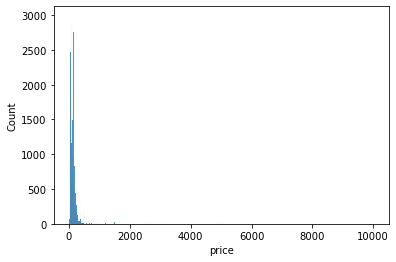

In [6]:
sns.histplot(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

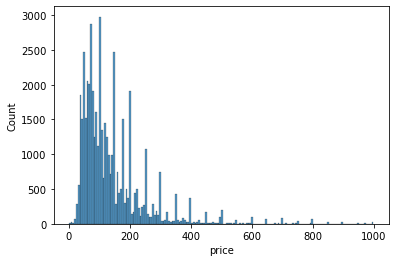

In [7]:
sns.histplot(df[df['price']<1000].price)

In [8]:
price_logs = np.log1p(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

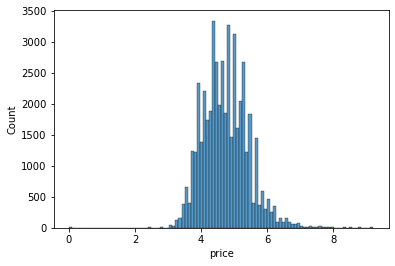

In [9]:
sns.histplot(price_logs, bins=100)

In [10]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.

In [11]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df = df[columns]

### Question 1

Find a feature with missing values. How many missing values does it have?

In [13]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [14]:
df['minimum_nights'].median()

3.0

In [15]:
df[ 'minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.

In [16]:
#from sklearn.model_selection import train_test_split

# X = df.drop(columns = ['price'])
# y = np.log1p(df['price'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [17]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [18]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [19]:
X = df.drop(columns = ['price'])
y = np.log1p(df['price'])

In [20]:
X_train, y_train = X.iloc[idx[:n_train]], y.iloc[idx[:n_train]]
X_val, y_val = X.iloc[idx[n_train:n_train+n_val]], y.iloc[idx[n_train:n_train+n_val]]
X_test, y_test = X.iloc[idx[n_train+n_val:]], y.iloc[idx[n_train+n_val:]]

In [21]:
n_train, n_test, n_val

(29337, 9779, 9779)

In [22]:
len(X_train), len(X_test), len(X_val)

(29337, 9779, 9779)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [23]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [24]:
X_train_filled_0 = X_train.fillna(0)
w0, w = train_linear_regression(X_train_filled_0, y_train)
y_pred = w0 + X_train_filled_0.dot(w)
score = rmse(y_train, y_pred)

print(round(score, 2))

0.64


In [25]:
X_val_filled_0 = X_val.fillna(0)
y_pred = w0 + X_val_filled_0.dot(w)
score = rmse(y_val, y_pred)

print(round(score, 2))

0.64


In [26]:
reviews_per_month_mean = X_train.reviews_per_month.mean()
X_train_filled_mean = X_train.fillna(reviews_per_month_mean)
w0, w = train_linear_regression(X_train_filled_mean, y_train)
y_pred = w0 + X_train_filled_mean.dot(w)
score = rmse(y_train, y_pred)

print(round(score, 2))

0.64


In [27]:
X_val_filled_mean = X_val.fillna(reviews_per_month_mean)
y_pred = w0 + X_val_filled_0.dot(w)
score = rmse(y_val, y_pred)

print(round(score, 2))

0.64


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [28]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [29]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train_filled_0, y_train, r)
    y_pred = w0 + X_train_filled_0.dot(w)
    score = rmse(y_train, y_pred)
    print(r, "-->",round(score, 2))

0 --> 0.64
1e-06 --> 0.64
0.0001 --> 0.64
0.001 --> 0.64
0.01 --> 0.65
0.1 --> 0.68
1 --> 0.68
5 --> 0.68
10 --> 0.68


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [30]:
rmse_diff_seeds = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    X_train, y_train = X.iloc[idx[:n_train]], y.iloc[idx[:n_train]]
    X_val, y_val = X.iloc[idx[n_train:n_train+n_val]], y.iloc[idx[n_train:n_train+n_val]]
    X_test, y_test = X.iloc[idx[n_train+n_val:]], y.iloc[idx[n_train+n_val:]]
    
    X_train_filled_0 = X_train.fillna(0)
    w0, w = train_linear_regression(X_train_filled_0, y_train)
    y_pred = w0 + X_train_filled_0.dot(w)
    rmse_diff_seeds.append(rmse(y_train, y_pred))
    

In [31]:
rmse_diff_seeds

[0.6465503241474283,
 0.6435218881530494,
 0.6456508852466987,
 0.6493842323357782,
 0.6417605310419227,
 0.6518143927773477,
 0.6493633659657787,
 0.6395938833193641,
 0.6452833282931805,
 0.6455498824478466]

In [32]:
np.std(rmse_diff_seeds)

0.003501893636002703

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Train a model with `r=0.001`.
* What's the RMSE on test dataset?

In [33]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
    
X_train, y_train = X.iloc[idx[:n_train+n_val]], y.iloc[idx[:n_train+n_val]]
X_test, y_test = X.iloc[idx[n_train+n_val:]], y.iloc[idx[n_train+n_val:]]
    
X_filled_0 = X_train.fillna(0)
X_test_filled_0 = X_test.fillna(0)
w0, w = train_linear_regression_reg(X_filled_0, y_train, 0.001)
y_pred = w0 + X_test_filled_0.dot(w)
rmse(y_test, y_pred)

0.6452771348323514

## Submit the results

Submit your results here: https://forms.gle/2N9GkTr1AgNeZ8hD7.

If your answer doesn't match options exactly, select the closest one.

## Deadline


The deadline for submitting is 20 September 2021, 17:00 CET. After that, the form will be closed.

## Nagivation

* [Machine Learning Zoomcamp course](../)
* [Session 2: Machine Learning for Regression](./)
* Previous: [Explore more](17-explore-more.md)